# Sect 20 (v2.1): Extensions to Linear Models

- online-ds-pt-100719
- 02/27/2020


## Objectives

**DISCUSSION:**
- Discuss interactions between variables
- Discuss polynomial regressions
- Discuss the Bias vs Variance trade-off



**APPLICATION:**
- [Sect 20: Interactions Lab](https://learn.co/tracks/module-2-data-science-career-2-1/statistics-ab-testing-and-linear-regression/section-20-extensions-to-linear-models/interactions-lab)
 

- [Sect 20: Polynomial Regression Lab](https://github.com/learn-co-students/dsc-polynomial-regression-lab-online-ds-pt-100719)

## Topics Covered in Section 20


- Interactions
- Polynomial Regression    
- [Bias-Variance Trade Off](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)

# Interactions

## What is an interaction?

When variables interact to **cause an effect** to another variable but is **not the sum of their parts**

> "An interaction is a particular property of two or more variables where they interact in a non-additive manner when affecting a third variable" - *Section recap*

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-interaction-terms-online-ds-pt-100719/master/images/new_diet_image.png">


> In our example, the interaction plot was composed out of categorical predictors (countries and diet type), but interactions can occur between categorical variables or between a mix of categorical variables and continuous variables!

### Confounding factor

>This means that the "Country" and "Diet" affect weight loss in a non-additive matter. If we're mostly interested in the effect of diet on weight loss (which seems to be plausible here), we say that "Country" is a **confounding factor** of the effect of "Diet" on weight loss.

![](images/diet_interaction.png)

### Why is important to account for interactions?

- "Not accounting for them might lead to results that are wrong."
- Replacing 2 individual columns with their interaction column can reduce the overall number of features.

- Addressing multicollinearity by creating an interaction variable instead of using the multicollinear ones.


- You'll also notice that including them when they're needed will increase your $R^2$ value!


### When should we use interactions?

- Whenever it can help the model, but not required.
- Can use in hypothesis testing as well (for ANOVAs)

## High-Level Programmatic Scrubbing

### Quick EDA/Srubbing with `pandas_profiling` and dictionaries.

- When we know what we must address, we can use advanced tool and loops/dictionaries to do all scrubbing in a few lines of code3

- [Speed Up Your Exploratory Data Analysis With Pandas-Profiling](https://towardsdatascience.com/speed-up-your-exploratory-data-analysis-with-pandas-profiling-88b33dc53625)

```python
from pandas_profiling import ProfileReport
ProfileReport(df)```

In [1]:
!pip install -U fsds_100719
from fsds_100719.imports import *

# pd.set_option('display.max_rows',999)
pd.set_option('display.max_columns',0)
plt.style.use('seaborn-notebook')

fsds_1007219  v0.7.13 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


['[i] Pandas .iplot() method activated.']


In [2]:
def load_dataset():
    df = fs.datasets.load_boston()

    # Making example column
    data = ['?',1,2,3,4,np.nan,"N/A"]
    df['example'] = np.random.choice(data,len(df),replace=True)
    return df

df = load_dataset()

In [3]:
# from pandas_profiling import ProfileReport
# ProfileReport(df)

#### OSEMN
1. **[OBTAIN](#OBTAIN)**
    - Import data, inspect, check dtypes, preview
    - Drop unneeded columns

2. **[SCRUB](#SCRUB)**
    - Recast data types
    - Find and deal with weird/placeholder values
    - Check for and Address null values
    - Identify (& remove) outliers
    - Check for multicollinearity
    - Normalize/standardize data (depending on type of model)
    

         
3. **[EXPLORE](#EXPLORE)**
    - [ ] Check distributions, outliers, etc
    - [ ] Check scales, ranges (df.describe())
    - [ ] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform.
    - [ ] Use scatter plots to check for linearity and possible categorical variables 
    - [ ] Check for linear relationships (if required by model).
   
4. **[MODEL](#MODEL)**

    - **Fit an initial model:** 
        - Run an initial model and get results

    - **Holdout validation / Train/test split**
        - use sklearn `train_test_split`
    
5. **[iNTERPRET](#iNTERPRET)**
    - **Assessing the model:**
        - Assess parameters (slope,intercept)
        - Check if the model explains the variation in the data (RMSE, F, R_square)
        - *Are the coeffs, slopes, intercepts in appropriate units?*
        - *Whats the impact of collinearity? Can we ignore?*
        <br><br>
    - **Revise the fitted model**
        - Multicollinearity is big issue for lin regression and cannot fully remove it
        - Use the predictive ability of model to test it (like R2 and RMSE)
        - Check for missed non-linearity
        
- **Interpret final model and draw >=3 conclusions and recommendations from dataset**

In [4]:
## Drop cols
drop_cols = []
[df.drop(col,axis=1,inplace=True) for col in drop_cols if col in df.columns]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,example
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,nan
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,?
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,N/A
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,nan


In [5]:
display(df['example'].value_counts())
print(f"# Null values: {df['example'].isna().sum()}")

N/A    78
nan    77
1      76
3      74
?      72
4      66
2      63
Name: example, dtype: int64

# Null values: 0


In [6]:
# help(df.replace)

In [7]:
## Replacing Values
repl_dict = {'example':
             {'?':0, 'N/A':np.nan,'nan':0 }
            }
             

for col,replace_vals in repl_dict.items():

    display(df[col].value_counts(dropna=False))
    df[col] = df[col].replace(replace_vals)
    display(df[col].value_counts(dropna=False))

N/A    78
nan    77
1      76
3      74
?      72
4      66
2      63
Name: example, dtype: int64

0      149
NaN     78
1       76
3       74
4       66
2       63
Name: example, dtype: int64

In [8]:
df['example'].isna().sum()

78

In [9]:
## Fill Null values / zeros
fillna_dict = {'example':0}
for col,val in fillna_dict.items():
    df[col] = df[col].fillna(val)
    
    
df['example'].value_counts(dropna=False)

0    227
1     76
3     74
4     66
2     63
Name: example, dtype: int64

In [10]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
example     object
dtype: object

In [11]:
## Recasting datatypes
recast_dict = {'CHAS':int, 'example':int}

for col,dtype in recast_dict.items():
    df[col] = df[col].astype(dtype)
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
example      int64
dtype: object

In [12]:
display(df.head(), df.dtypes, df.isna().sum())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,example
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0


CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
example      int64
dtype: object

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
example    0
dtype: int64

In [13]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,example
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,3
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,1
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,0


In [14]:
def scrub_df(data,drop_cols =[],#['id','date','view'],
                       repl_dict = {},#{'sqft_basement':('?','0.0')},
                       recast_dict = {},#{'sqft_basement':'float'},
                       fillna_dict = {},#{'waterfront':0,'yr_renovated':0},
                      verbose=1):
    """
    Performs scrubbing process on the df in the following order:
    1. Drop cols in the drop_cols list
    2. Replace values using repl_dict
    3. Recast dtypes using recast_dict
    4. Fillna using fillna_dict
    
    Args:
        data (Frame):
        drop_cols (list):
        repl_dict (dict): Key=column name, 
                            value= dict of {to_replace:replace_with}
        recast_dict(dict): 
        fillna_dict(dict): key = column name,
                            val = value to fill with or function to apply 
    """
    import copy
    df = copy.deepcopy(data)#.copy()
    
    ## Drop cols
    drop_cols = []
    [df.drop(col,axis=1,inplace=True) for col in drop_cols if col in df.columns]


    ## Replacing Values
    for col,replace_vals in repl_dict.items():
            df[col] = df[col].replace(replace_vals)


    
    ## Fill Null values / zeros
    for col,val in fillna_dict.items():
        import types
        if isinstance(val, types.FunctionType):
            fill_val = val(df[col])
        else:
            fill_val = val
        
        df[col].fillna(fill_val,inplace=True)
 
    ## Recasting datatypes
    for col,dtype in recast_dict.items():
        df[col] = df[col].astype(dtype)
    df.dtypes
    
    ## display preview
    if verbose>0:
        display(df.head())
    if verbose>1:
        display(df.info())

    return df
    

In [15]:
df = load_dataset()
df = scrub_df(df,drop_cols=drop_cols,repl_dict=repl_dict, 
              recast_dict=recast_dict,fillna_dict=fillna_dict)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,example
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,3
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0


In [16]:
df.describe().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,example
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533,1.415
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197,1.486
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000,0.000
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.378,6.950,17.025,0.000
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200,1.000
75%,3.677,12.500,18.100,0.000,0.624,6.624,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000,3.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.126,24.000,711.000,22.000,396.900,37.970,50.000,4.000


In [17]:
display(df.head(), df.dtypes, df.isna().sum())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,example
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,3
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0


CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
example      int64
dtype: object

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
example    0
dtype: int64

In [18]:
df.select_dtypes('int').columns

Index(['CHAS', 'example'], dtype='object')

In [19]:
## Get lists of categorical vs numeric columns


## Scale non-categorical columns
cat_cols = list(df.select_dtypes('int').columns)

num_cols = list(df.select_dtypes(include=['number'],
                           exclude=['int']).columns)

cat_cols,num_cols

(['CHAS', 'example'],
 ['CRIM',
  'ZN',
  'INDUS',
  'NOX',
  'RM',
  'AGE',
  'DIS',
  'RAD',
  'TAX',
  'PTRATIO',
  'B',
  'LSTAT',
  'price'])

In [20]:
from sklearn.preprocessing import scale,StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,example
0,-0.419782,0.284830,-1.287909,0,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686,0
1,-0.417339,-0.487722,-0.593381,0,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524,3
2,-0.417342,-0.487722,-0.593381,0,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247,0
3,-0.416750,-0.487722,-1.306878,0,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758,1
4,-0.412482,-0.487722,-1.306878,0,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503,0


In [21]:
# deal with outliers in numeric non-target columns
ignore_cols = ['price',*cat_cols]
[num_cols.remove(col) for col in ignore_cols if col in num_cols]
num_cols

['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [22]:
df_outs = pd.DataFrame()

for col in num_cols:
    
    idx_outs = fs.find_outliers_Z(df[col])
    df_outs[col] = idx_outs

out_rows = df_outs.any(axis=1)

print(f"There are {out_rows.sum()} rows with outliers out of {len(df_outs)} rows.")

print(df_outs.sum())

There are 58 rows with outliers out of 506 rows.
CRIM        8
ZN         14
INDUS       0
NOX         0
RM          8
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO     0
B          25
LSTAT       5
dtype: int64


In [23]:
df = df[~out_rows].reset_index(drop=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,example
0,-0.419782,0.284830,-1.287909,0,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686,0
1,-0.417339,-0.487722,-0.593381,0,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524,3
2,-0.417342,-0.487722,-0.593381,0,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247,0
3,-0.416750,-0.487722,-1.306878,0,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758,1
4,-0.412482,-0.487722,-1.306878,0,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503,0


In [24]:
import scipy.stats as stats
import statsmodels.api as sms
import statsmodels.formula.api as smf


def make_ols_f(df,target='price',col_list=None,exclude_cols=[],
               cat_cols = [],  show_summary=True,
               diagnose=True,
               return_formula=False):
    """
    Makes statsmodels formula-based regression with options to make categorical columns.    
    Args:
        df (Frame): df with data
        target (str): target column name
        col_list (list, optional): List of predictor columns. Defaults to all except target.
        exclude_cols (list, optional): Columns to remove from col_list. Defaults to [].
        cat_cols (list, optional): Columns to process as categorical using f'C({col})". Defaults to [].
        show_summary (bool, optional): Display model.summary(). Defaults to True.
        diagnose (bool, optional): Plot Q-Q plot & residuals. Defaults to True.
        return_formula (bool, optional): Return formula with model. Defaults to False.
    
    Returns:
        model : statsmodels ols model
        formula : str formula from model, only if return_formula == True
        
    
    """
    if col_list is None:
        col_list = list(df.drop(target,axis=1).columns)
        
    ## remove exclude cols
    [col_list.remove(ecol) for ecol in exclude_cols if ecol in col_list]

    ## Make rightn side of formula eqn
    features = '+'.join(col_list)

    # ADD C() around categorical cols
    for col in cat_cols:
        features = features.replace(col,f"C({col})")

    ## MAKE FULL FORMULA
    formula = target+'~'+features #target~predictors
    #print(formula)
    
    ## Fit model
    model = smf.ols(formula=formula, data=df).fit()
    
    ## Display summary
    if show_summary:
        display(model.summary())
        
    ## Plot Q-Qplot & model residuals
    if diagnose:
        fig,ax = diagnose_model(model)
        plt.show()

    # Returns formula or just mmodel
    if return_formula:
        return model,formula
    else:
        return model

    
def diagnose_model(model):
    """
    Plot Q-Q plot and model residuals from statsmodels ols model.
    
    Args:
        model (smf.ols model): statsmodels formula ols 
    
    Returns:
        fig, ax: matplotlib objects
    """
    
    resids = model.resid
    
    fig,ax = plt.subplots(ncols=2,figsize=(10,5))
    sms.qqplot(resids, stats.distributions.norm,
              fit=True, line='45',ax=ax[0])
    xs = np.linspace(0,1,len(resids))
    ax[1].scatter(x=xs,y=resids)
    
    return fig,ax 

In [25]:
cat_cols

['CHAS', 'example']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     69.70
Date:                Mon, 02 Mar 2020   Prob (F-statistic):          7.11e-112
Time:                        00:57:22   Log-Likelihood:                -303.34
No. Observations:                 448   AIC:                             642.7
Df Residuals:                     430   BIC:                             716.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0264      0.037     -0.706      0.481      -0.100       0.047
C(CHAS)[T.1]        0.3578      0.092      3.907      0.000       0.178       0.538
C(example)[T.1]    -0.0208      0.067     -0.312      0.755      -0.152       0.110
C(example)[T.2]    -0.0332      0.078     -0.427      0.670      -0.186       0.120
C(example)[T.3]    -0.0585      0.068     -0.867      0.387      -0.191       0.074
C(example)[T.4]    -0.1023      0.075     -1.359      0.175      -0.250       0.046
CRIM               -0.1255      0.075     -1.681      0.093      -0.272       0.021
ZN                  0.0179      0.039      0.457      0.648      -0.059       0.095
INDUS               0.0291      0.044      0.658      0.511      -0.058       0.116
NOX                -0.1914      0.049     -3.924      0.000      -0.287      -0.096
RM                  0.3787      0.037     10.186      0.000       0.306       0.452
AGE                -0.0324      0.040     -0.809      0.419      -0.111       0.046
DIS                -0.2927      0.048     -6.119      0.000      -0.387      -0.199
RAD                 0.2482      0.068      3.633      0.000       0.114       0.382
TAX                -0.1846      0.068     -2.726      0.007      -0.318      -0.051
PTRATIO            -0.2067      0.031     -6.744      0.000      -0.267      -0.146
B                   0.0741      0.045      1.651      0.100      -0.014       0.162
LSTAT              -0.3962      0.045     -8.871      0.000      -0.484      -0.308
==============================================================================
Omnibus:                      209.733   Durbin-Watson:                   1.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1494.727
Skew:                           1.884   Prob(JB):                         0.00
Kurtosis:                      11.117   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

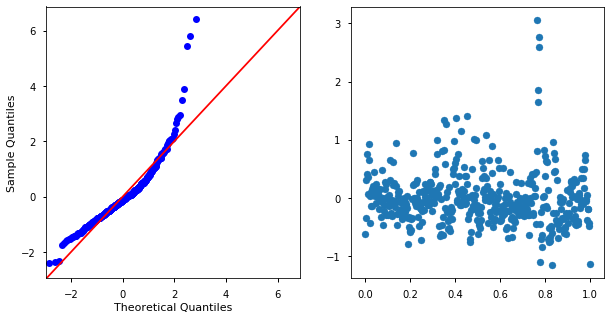

In [26]:
model = make_ols_f(df,target='price',cat_cols=cat_cols)

In [27]:
## Get p-values
def get_model_params(model):
    coeffs =pd.DataFrame({'p-value':model.pvalues,
                          'coeff':model.params,
                         'sig':model.pvalues<.05}).round(4)
#     coeffs.sort_values('sig')
    return coeffs
coeffs = get_model_params(model)
coeffs

,p-value,coeff,sig
Intercept,0.4806,-0.0264,False
C(CHAS)[T.1],0.0001,0.3578,True
C(example)[T.1],0.7553,-0.0208,False
C(example)[T.2],0.6696,-0.0332,False
C(example)[T.3],0.3867,-0.0585,False
C(example)[T.4],0.1748,-0.1023,False
CRIM,0.0935,-0.1255,False
ZN,0.6482,0.0179,False
INDUS,0.5108,0.0291,False
NOX,0.0001,-0.1914,True


In [28]:
## get list of cols to exclude
coeffs.query('sig == False')#.index


,p-value,coeff,sig
Intercept,0.4806,-0.0264,False
C(example)[T.1],0.7553,-0.0208,False
C(example)[T.2],0.6696,-0.0332,False
C(example)[T.3],0.3867,-0.0585,False
C(example)[T.4],0.1748,-0.1023,False
CRIM,0.0935,-0.1255,False
ZN,0.6482,0.0179,False
INDUS,0.5108,0.0291,False
AGE,0.4189,-0.0324,False
B,0.0995,0.0741,False


In [29]:
best_model_kws = dict(target='price',cat_cols=cat_cols,exclude_cols=[
    'example','ZN','CRIM','INDUS','AGE',],return_formula=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     131.4
Date:                Mon, 02 Mar 2020   Prob (F-statistic):          1.69e-118
Time:                        00:57:22   Log-Likelihood:                -306.68
No. Observations:                 448   AIC:                             633.4
Df Residuals:                     438   BIC:                             674.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0465      0.025     -1.847      0.065      -0.096       0.003
C(CHAS)[T.1]     0.3597      0.090      3.996      0.000       0.183       0.537
NOX             -0.1897      0.045     -4.194      0.000      -0.279      -0.101
RM               0.3682      0.035     10.401      0.000       0.299       0.438
DIS             -0.2701      0.040     -6.738      0.000      -0.349      -0.191
RAD              0.1876      0.057      3.308      0.001       0.076       0.299
TAX             -0.1595      0.059     -2.685      0.008      -0.276      -0.043
PTRATIO         -0.2091      0.028     -7.373      0.000      -0.265      -0.153
B                0.0754      0.044      1.710      0.088      -0.011       0.162
LSTAT           -0.4316      0.039    -10.971      0.000      -0.509      -0.354
==============================================================================
Omnibus:                      200.598   Durbin-Watson:                   1.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1397.650
Skew:                           1.790   Prob(JB):                    3.19e-304
Kurtosis:                      10.877   Cond. No.                         7.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

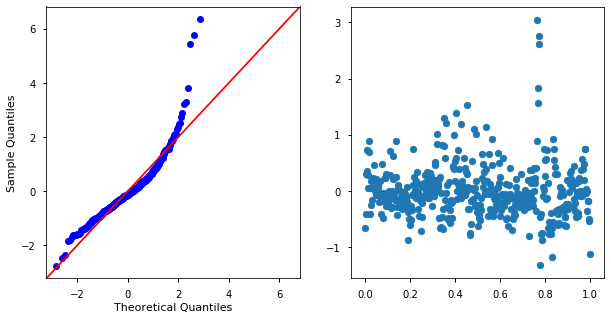

In [30]:
model= make_ols_f(df,**best_model_kws)#target='price',cat_cols=cat_cols,exclude_cols=[
#     'example','ZN','CRIM','INDUS','AGE',])

# Using seaborn to view interactions

### Ex Interaction: Not very different

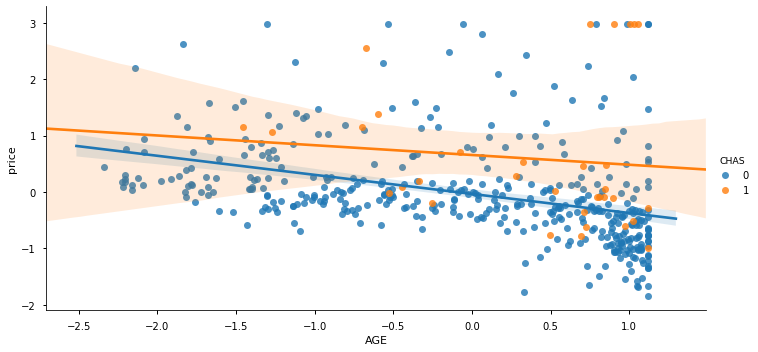

In [31]:
g = sns.FacetGrid(df,hue='CHAS',aspect=2,height=5)
g.map(sns.regplot,'AGE','price')
g.add_legend()

### Ex Interaction: different

https://blog.insightdatascience.com/data-visualization-in-python-advanced-functionality-in-seaborn-20d217f1a9a6

- ~~`sns.factorplot`~~
- `sns.catplot`
- `sns.FacetGrid`

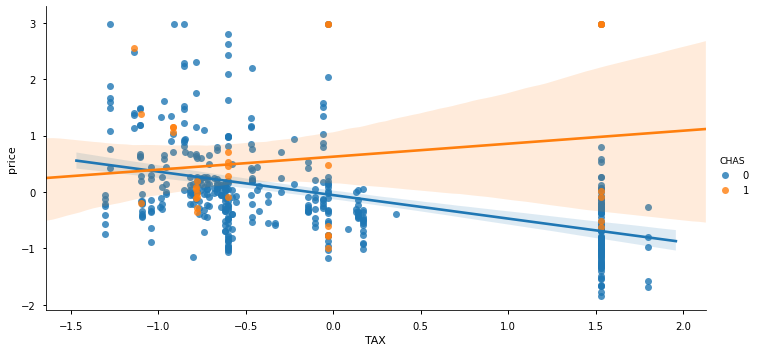

In [32]:
g = sns.FacetGrid(df,hue='CHAS',aspect=2,height=5)
g.map(sns.regplot,'TAX','price')
g.add_legend()

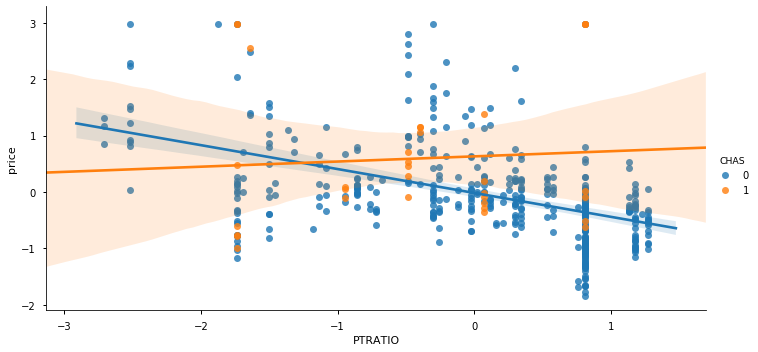

In [33]:
g = sns.FacetGrid(df,hue='CHAS',aspect=2,height=5)
g.map(sns.regplot,'PTRATIO','price')
g.add_legend()

## Interactions Effect On Model

In [34]:
pd.set_option('display.max_rows',999)
best_model_kws

{'target': 'price',
 'cat_cols': ['CHAS', 'example'],
 'exclude_cols': ['example', 'ZN', 'CRIM', 'INDUS', 'AGE'],
 'return_formula': True}

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     131.4
Date:                Mon, 02 Mar 2020   Prob (F-statistic):          1.69e-118
Time:                        00:57:24   Log-Likelihood:                -306.68
No. Observations:                 448   AIC:                             633.4
Df Residuals:                     438   BIC:                             674.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0465      0.025     -1.847      0.065      -0.096       0.003
C(CHAS)[T.1]     0.3597      0.090      3.996      0.000       0.183       0.537
NOX             -0.1897      0.045     -4.194      0.000      -0.279      -0.101
RM               0.3682      0.035     10.401      0.000       0.299       0.438
DIS             -0.2701      0.040     -6.738      0.000      -0.349      -0.191
RAD              0.1876      0.057      3.308      0.001       0.076       0.299
TAX             -0.1595      0.059     -2.685      0.008      -0.276      -0.043
PTRATIO         -0.2091      0.028     -7.373      0.000      -0.265      -0.153
B                0.0754      0.044      1.710      0.088      -0.011       0.162
LSTAT           -0.4316      0.039    -10.971      0.000      -0.509      -0.354
==============================================================================
Omnibus:                      200.598   Durbin-Watson:                   1.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1397.650
Skew:                           1.790   Prob(JB):                    3.19e-304
Kurtosis:                      10.877   Cond. No.                         7.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

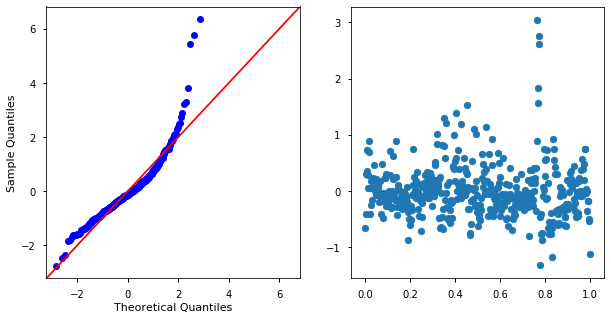

price~C(CHAS)+NOX+RM+DIS+RAD+TAX+PTRATIO+B+LSTAT


In [35]:
model,form = make_ols_f(df,**best_model_kws)
print(form)

### adding interactions

In [36]:
exclude_cols = best_model_kws['exclude_cols']
target= 'price'
ixn_cols=[('CHAS','LSTAT')]
col_list = list(df.drop(target,axis=1).columns)

In [37]:
## remove exclude cols
[col_list.remove(ecol) for ecol in exclude_cols if ecol in col_list]

## ADDDING INTERACTION TERMS    
# if len(ixn_cols)>0:
for ixn in ixn_cols:
    ixn_term=f"{ixn[0]}*{ixn[1]}"
    col_list.append(ixn_term) #= features + ixn_term
col_list

['CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'CHAS*LSTAT']

In [38]:
features = ' + '.join(col_list)
features

for col in cat_cols:
    features = features.replace(col,f"C({col})")

features

'C(CHAS) + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT + C(CHAS)*LSTAT'

In [39]:
## MAKE FULL FORMULA
formula = target+'~'+features #target~predictors
print(formula)

price~C(CHAS) + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT + C(CHAS)*LSTAT


In [40]:
## Fit model
model = smf.ols(formula=formula, data=df).fit()
model.summary()
## Display summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     120.2
Date:                Mon, 02 Mar 2020   Prob (F-statistic):          1.02e-118
Time:                        00:57:24   Log-Likelihood:                -303.60
No. Observations:                 448   AIC:                             629.2
Df Residuals:                     437   BIC:                             674.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0472      0.025     -1.885      0.060      -0.096       0.002
C(CHAS)[T.1]           0.3290      0.090      3.639      0.000       0.151       0.507
NOX                   -0.1842      0.045     -4.091      0.000      -0.273      -0.096
RM                     0.3610      0.035     10.222      0.000       0.292       0.430
DIS                   -0.2628      0.040     -6.575      0.000      -0.341      -0.184
RAD                    0.1893      0.056      3.357      0.001       0.078       0.300
TAX                   -0.1717      0.059     -2.897      0.004      -0.288      -0.055
PTRATIO               -0.2109      0.028     -7.477      0.000      -0.266      -0.155
B                      0.0800      0.044      1.824      0.069      -0.006       0.166
LSTAT                 -0.4111      0.040    -10.280      0.000      -0.490      -0.333
C(CHAS)[T.1]:LSTAT    -0.2398      0.098     -2.457      0.014      -0.432      -0.048
==============================================================================
Omnibus:                      199.113   Durbin-Watson:                   1.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1421.890
Skew:                           1.764   Prob(JB):                    1.74e-309
Kurtosis:                      10.983   Cond. No.                         8.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
def make_ols_f_ixn(df,target='price',col_list=None,exclude_cols=[],
               cat_cols = [], ixn_cols=[],  show_summary=True,
               diagnose=True,
               return_formula=False):
    """
    Makes statsmodels formula-based regression with options to make categorical columns.    
    Args:
        df (Frame): df with data
        target (str): target column name
        col_list (list, optional): List of predictor columns. Defaults to all except target.
        exclude_cols (list, optional): Columns to remove from col_list. Defaults to [].
        cat_cols (list, optional): Columns to process as categorical using f'C({col})". Defaults to [].
        ixn_cols ()
        show_summary (bool, optional): Display model.summary(). Defaults to True.
        diagnose (bool, optional): Plot Q-Q plot & residuals. Defaults to True.
        return_formula (bool, optional): Return formula with model. Defaults to False.
    
    Returns:
        model : statsmodels ols model
        formula : str formula from model, only if return_formula == True
        
    
    """
    if col_list is None:
        col_list = list(df.drop(target,axis=1).columns)
        
    ## remove exclude cols
    [col_list.remove(ecol) for ecol in exclude_cols if ecol in col_list]
    
    ## ADDDING INTERACTION TERMS    
    if len(ixn_cols)>0:
        for ixn in ixn_cols:
            ixn_term=f"{ixn[0]}*{ixn[1]}"
            col_list.append(ixn_term) #= features + ixn_term
        
        
    ## Make rightn side of formula eqn
    features = '+'.join(col_list)

    # ADD C() around categorical cols
    for col in cat_cols:
        features = features.replace(col,f"C({col})")


        
    ## MAKE FULL FORMULA
    formula = target+'~'+features #target~predictors
    #print(formula)
    
    ## Fit model
    model = smf.ols(formula=formula, data=df).fit()
    
    ## Display summary
    if show_summary:
        display(model.summary())
        
    ## Plot Q-Qplot & model residuals
    if diagnose:
        fig,ax = diagnose_model(model)
        plt.show()

    # Returns formula or just mmodel
    if return_formula:
        return model,formula
    else:
        return model
    
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     120.2
Date:                Mon, 02 Mar 2020   Prob (F-statistic):          1.02e-118
Time:                        00:57:24   Log-Likelihood:                -303.60
No. Observations:                 448   AIC:                             629.2
Df Residuals:                     437   BIC:                             674.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0472      0.025     -1.885      0.060      -0.096       0.002
C(CHAS)[T.1]           0.3290      0.090      3.639      0.000       0.151       0.507
NOX                   -0.1842      0.045     -4.091      0.000      -0.273      -0.096
RM                     0.3610      0.035     10.222      0.000       0.292       0.430
DIS                   -0.2628      0.040     -6.575      0.000      -0.341      -0.184
RAD                    0.1893      0.056      3.357      0.001       0.078       0.300
TAX                   -0.1717      0.059     -2.897      0.004      -0.288      -0.055
PTRATIO               -0.2109      0.028     -7.477      0.000      -0.266      -0.155
B                      0.0800      0.044      1.824      0.069      -0.006       0.166
LSTAT                 -0.4111      0.040    -10.280      0.000      -0.490      -0.333
C(CHAS)[T.1]:LSTAT    -0.2398      0.098     -2.457      0.014      -0.432      -0.048
==============================================================================
Omnibus:                      199.113   Durbin-Watson:                   1.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1421.890
Skew:                           1.764   Prob(JB):                    1.74e-309
Kurtosis:                      10.983   Cond. No.                         8.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

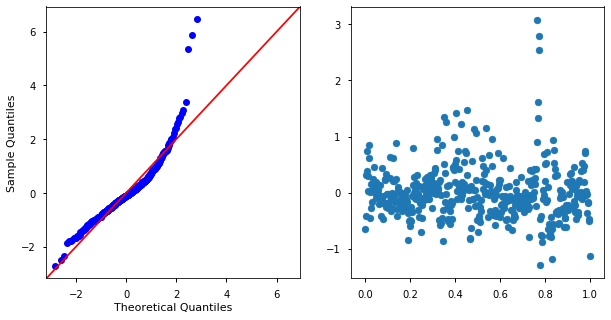

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1c29368d30>,
 'price~C(CHAS)+NOX+RM+DIS+RAD+TAX+PTRATIO+B+LSTAT+C(CHAS)*LSTAT')

In [42]:
make_ols_f_ixn(df,ixn_cols=ixn_cols,**best_model_kws)

### Make interaction term pairs

In [43]:
import itertools
make_combs = df.drop(columns=['price',*best_model_kws['exclude_cols']]).columns
col_pairs  = list(itertools.combinations(make_combs,2))
col_pairs[:5]

[('CHAS', 'NOX'),
 ('CHAS', 'RM'),
 ('CHAS', 'DIS'),
 ('CHAS', 'RAD'),
 ('CHAS', 'TAX')]

In [44]:
best_model_kws['ixn_cols']=col_pairs

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     59.22
Date:                Mon, 02 Mar 2020   Prob (F-statistic):          9.27e-150
Time:                        00:57:24   Log-Likelihood:                -144.59
No. Observations:                 448   AIC:                             381.2
Df Residuals:                     402   BIC:                             570.0
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.2068      0.065     -3.180      0.002      -0.335      -0.079
C(CHAS)[T.1]             0.3429      0.187      1.833      0.067      -0.025       0.711
NOX                     -0.2766      0.058     -4.775      0.000      -0.391      -0.163
C(CHAS)[T.1]:NOX        -0.4104      0.173     -2.372      0.018      -0.751      -0.070
RM                       0.3523      0.034     10.241      0.000       0.285       0.420
C(CHAS)[T.1]:RM         -0.1402      0.113     -1.243      0.215      -0.362       0.082
DIS                     -0.4547      0.073     -6.196      0.000      -0.599      -0.310
C(CHAS)[T.1]:DIS        -0.1100      0.300     -0.366      0.714      -0.701       0.481
RAD                      0.1718      0.104      1.645      0.101      -0.034       0.377
C(CHAS)[T.1]:RAD        -0.3173      0.392     -0.810      0.418      -1.087       0.452
TAX                     -0.2577      0.113     -2.282      0.023      -0.480      -0.036
C(CHAS)[T.1]:TAX         0.8590      0.506      1.698      0.090      -0.136       1.854
PTRATIO                 -0.0966      0.099     -0.973      0.331      -0.292       0.098
C(CHAS)[T.1]:PTRATIO    -0.0590      0.190     -0.310      0.757      -0.433       0.315
B                        0.0987      0.087      1.140      0.255      -0.072       0.269
C(CHAS)[T.1]:B           0.0683      0.164      0.416      0.678      -0.255       0.391
LSTAT                   -0.4623      0.043    -10.792      0.000      -0.546      -0.378
C(CHAS)[T.1]:LSTAT      -0.0508      0.138     -0.369      0.712      -0.321       0.220
NOX:RM                  -0.0043      0.057     -0.074      0.941      -0.117       0.109
NOX:DIS                 -0.0540      0.058     -0.924      0.356      -0.169       0.061
NOX:RAD                 -0.3440      0.130     -2.637      0.009      -0.600      -0.088
NOX:TAX                  0.2994      0.136      2.210      0.028       0.033       0.566
NOX:PTRATIO              0.0151      0.059      0.259      0.796      -0.100       0.130
NOX:B                    0.0349      0.059      0.591      0.555      -0.081       0.151
NOX:LSTAT               -0.0199      0.057     -0.349      0.727      -0.132       0.092
RM:DIS                   0.0754      0.045      1.681      0.093      -0.013       0.164
RM:RAD                  -0.0983      0.088     -1.116      0.265      -0.271       0.075
RM:TAX                  -0.0229      0.093     -0.247      0.805      -0.205       0.159
RM:PTRATIO              -0.1014      0.033     -3.062      0.002      -0.167      -0.036
RM:B                    -0.1600      0.058     -2.738      0.006      -0.275      -0.045
RM:LSTAT                -0.1905      0.031     -6.234      0.000      -0.251      -0.130
DIS:RAD                 -0.3657      0.105     -3.487    

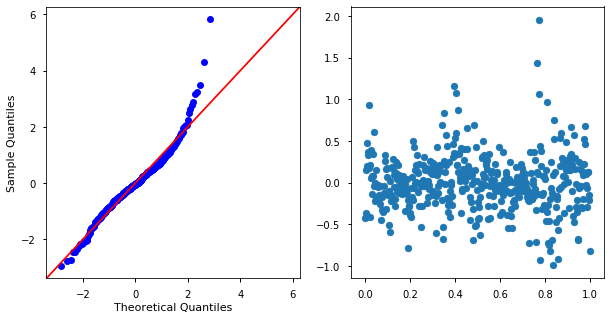

,p-value,coeff,sig
C(CHAS)[T.1]:NOX,0.0182,-0.4104,True
DIS,0.0000,-0.4547,True
DIS:RAD,0.0005,-0.3657,True
Intercept,0.0016,-0.2068,True
LSTAT,0.0000,-0.4623,True
NOX,0.0000,-0.2766,True
NOX:RAD,0.0087,-0.3440,True
NOX:TAX,0.0277,0.2994,True
RM,0.0000,0.3523,True
RM:B,0.0064,-0.1600,True


In [45]:
model,f = make_ols_f_ixn(df,**best_model_kws,)
# help(get_model_params(model).sort_index().style.background_gradient)
params= get_model_params(model).sort_index()
params.loc[params['sig']==True]

In [46]:
params.style.applymap(lambda x: 'color:red' if x >.05 else 'color:green',
                     subset=['p-value'])#

,p-value,coeff,sig
B,0.255,0.0987,False
B:LSTAT,0.0768,-0.105,False
C(CHAS)[T.1],0.0675,0.3429,False
C(CHAS)[T.1]:B,0.6779,0.0683,False
C(CHAS)[T.1]:DIS,0.7144,-0.11,False
C(CHAS)[T.1]:LSTAT,0.7122,-0.0508,False
C(CHAS)[T.1]:NOX,0.0182,-0.4104,True
C(CHAS)[T.1]:PTRATIO,0.7566,-0.059,False
C(CHAS)[T.1]:RAD,0.4182,-0.3173,False
C(CHAS)[T.1]:RM,0.2146,-0.1402,False


In [47]:
good_ixn = params.loc[params['sig']==True].sort_index()
good_ixn

,p-value,coeff,sig
C(CHAS)[T.1]:NOX,0.0182,-0.4104,True
DIS,0.0000,-0.4547,True
DIS:RAD,0.0005,-0.3657,True
Intercept,0.0016,-0.2068,True
LSTAT,0.0000,-0.4623,True
NOX,0.0000,-0.2766,True
NOX:RAD,0.0087,-0.3440,True
NOX:TAX,0.0277,0.2994,True
RM,0.0000,0.3523,True
RM:B,0.0064,-0.1600,True


In [48]:
ixn_cols = [col for col in good_ixn.index.to_list() if ":" in col]
ixn_cols = list(map(lambda x: x.split(':'),ixn_cols))
ixn_cols[0] = ['CHAS','NOX']
ixn_cols

[['CHAS', 'NOX'],
 ['DIS', 'RAD'],
 ['NOX', 'RAD'],
 ['NOX', 'TAX'],
 ['RM', 'B'],
 ['RM', 'LSTAT'],
 ['RM', 'PTRATIO']]

In [49]:
best_model_kws

{'target': 'price',
 'cat_cols': ['CHAS', 'example'],
 'exclude_cols': ['example', 'ZN', 'CRIM', 'INDUS', 'AGE'],
 'return_formula': True,
 'ixn_cols': [('CHAS', 'NOX'),
  ('CHAS', 'RM'),
  ('CHAS', 'DIS'),
  ('CHAS', 'RAD'),
  ('CHAS', 'TAX'),
  ('CHAS', 'PTRATIO'),
  ('CHAS', 'B'),
  ('CHAS', 'LSTAT'),
  ('NOX', 'RM'),
  ('NOX', 'DIS'),
  ('NOX', 'RAD'),
  ('NOX', 'TAX'),
  ('NOX', 'PTRATIO'),
  ('NOX', 'B'),
  ('NOX', 'LSTAT'),
  ('RM', 'DIS'),
  ('RM', 'RAD'),
  ('RM', 'TAX'),
  ('RM', 'PTRATIO'),
  ('RM', 'B'),
  ('RM', 'LSTAT'),
  ('DIS', 'RAD'),
  ('DIS', 'TAX'),
  ('DIS', 'PTRATIO'),
  ('DIS', 'B'),
  ('DIS', 'LSTAT'),
  ('RAD', 'TAX'),
  ('RAD', 'PTRATIO'),
  ('RAD', 'B'),
  ('RAD', 'LSTAT'),
  ('TAX', 'PTRATIO'),
  ('TAX', 'B'),
  ('TAX', 'LSTAT'),
  ('PTRATIO', 'B'),
  ('PTRATIO', 'LSTAT'),
  ('B', 'LSTAT')]}

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     103.5
Date:                Mon, 02 Mar 2020   Prob (F-statistic):          2.23e-136
Time:                        00:57:25   Log-Likelihood:                -246.38
No. Observations:                 448   AIC:                             526.8
Df Residuals:                     431   BIC:                             596.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1722      0.038     -4.549      0.000      -0.247      -0.098
C(CHAS)[T.1]         0.3311      0.083      4.007      0.000       0.169       0.493
NOX                 -0.1630      0.047     -3.482      0.001      -0.255      -0.071
C(CHAS)[T.1]:NOX     0.0117      0.068      0.172      0.864      -0.122       0.145
RM                   0.2584      0.034      7.498      0.000       0.191       0.326
DIS                 -0.2983      0.046     -6.533      0.000      -0.388      -0.209
RAD                  0.2042      0.060      3.376      0.001       0.085       0.323
TAX                 -0.1987      0.053     -3.722      0.000      -0.304      -0.094
PTRATIO             -0.1235      0.026     -4.670      0.000      -0.175      -0.071
B                    0.0442      0.043      1.016      0.310      -0.041       0.130
LSTAT               -0.5895      0.040    -14.833      0.000      -0.668      -0.511
DIS:RAD             -0.2080      0.060     -3.466      0.001      -0.326      -0.090
NOX:RAD             -0.2677      0.079     -3.405      0.001      -0.422      -0.113
NOX:TAX              0.1046      0.082      1.272      0.204      -0.057       0.266
RM:B                -0.0670      0.055     -1.208      0.228      -0.176       0.042
RM:LSTAT            -0.1932      0.026     -7.531      0.000      -0.244      -0.143
RM:PTRATIO          -0.0961      0.024     -4.006      0.000      -0.143      -0.049
==============================================================================
Omnibus:                      199.746   Durbin-Watson:                   1.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1651.401
Skew:                           1.716   Prob(JB):                         0.00
Kurtosis:                      11.757   Cond. No.                         11.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

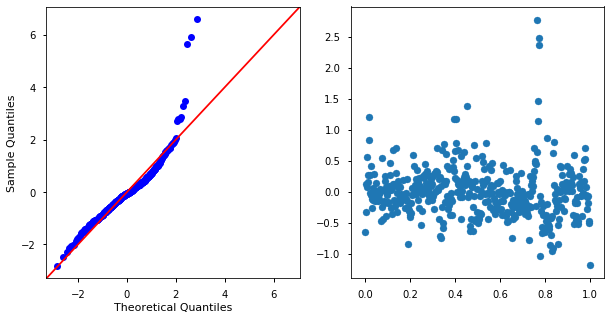

In [50]:
model = make_ols_f_ixn(df,**dict(best_model_kws,
                                ixn_cols=ixn_cols))

# Polynomial Regressions

Remember we started with (multiple) linear equation:

$$ \large \hat{y} = w_0 + w_1  x_1 + w_2  x_2 + ... + w_N  x_N $$
$$ \large \hat{y} = \sum_{n=0}^{N} w_n x_n $$


**Knowledge check:** Why is this "linear"?

## Making it more complex!

In [51]:
# ## LOOKING FOR NON-LINEAR RELATIONSHIPS

# from itertools import combinations,product
# drop_cols = ['price']
# comb_cols = list(combinations(df.drop(drop_cols,axis=1).columns,2))

# cols_v_target = list(product(df.columns,['price']))
# cols_v_target

### Looking for Non-linear relationships

In [52]:
import plotly.express as px
# px.scatter_matrix(df,size_max=1,height=1000)

px.scatter(x='LSTAT',y='price',data_frame=df)#,

# BOOKMARK

In [53]:
X = df.drop(columns=[*cat_cols,target])

y = df[target]
display(X.head(),y.head())

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


0    0.159686
1   -0.101524
2    1.324247
3    1.182758
4    1.487503
Name: price, dtype: float64

In [54]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)

X = poly.fit_transform(X)
X.shape

(448, 18564)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg = LinearRegression()

reg.fit(X,y)
r2 =r2_score(y, reg.predict(X))
print(r2)

1.0


TypeError: '(slice(None, None, None), 1)' is an invalid key

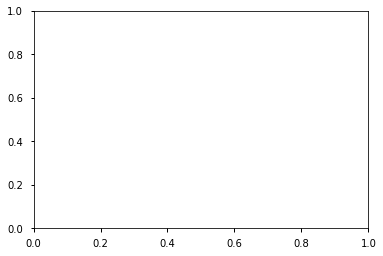

In [67]:
fig,ax = plt.subplots()
ax.scatter(X[:,1],y)
ax.set(xlabel=col,ylabel=target)
# ax.plot(X,reg.predict(X),color='red')
plt.show()

0.5359222698372504


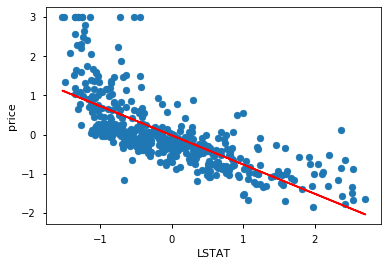

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

target = 'price'
col='LSTAT'
exp = 4

y = df[target].copy()
X = df[[col]].copy()

#     df_poly = pd.concat([X,y],axis=1)
reg = LinearRegression()
reg.fit(X,y)
r2 =r2_score(y, reg.predict(X))
print(r2)

fig,ax = plt.subplots()
ax.scatter(X,y)
ax.set(xlabel=col,ylabel=target)
ax.plot(X,reg.predict(X),color='red')
plt.show()

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

target = 'price'
col_list=['lat']
exp = 4
for col in col_list:
    
    y = df[target].copy()
    X = df[[col]].copy()
    
#     df_poly = pd.concat([X,y],axis=1)
    reg = LinearRegression()
    reg.fit(X,y)
    r2 =r2_score(y, reg.predict(X))
    print(r2)
    
    fig,ax = plt.subplots()
    ax.scatter(X,y)
    ax.set(xlabel=col,ylabel=target)
    ax.plot(X,reg.predict(X),color='red')
    plt.show()
    
    
    
    y = df[target].copy()
    X = df[[col]].copy()

    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(exp)
    X = poly.fit_transform(X)
    reg = LinearRegression()
    
    reg.fit(X,y)
    r2 =r2_score(y, reg.predict(X))
    print(r2)
    
    fig,ax = plt.subplots()
    ax.scatter(df[[col]],y)
    ax.set(xlabel=col,ylabel=target)
    ax.plot(df[[col]],reg.predict(X),color='red')
    plt.show()
    
#     exp_col =f"{col}_{exp}" 
#     df_poly[exp_col] = df_poly[col]**exp

# #     make_ols_f(df_poly,target=target,cat_cols=[],col_list=[col])


    
#     plt.figure()
#     df_poly.plot(kind='scatter',x=exp_col,y=target)
#     make_ols_f(df_poly,target=target,cat_cols=[],col_list=[exp_col])

KeyError: "None of [Index(['lat'], dtype='object')] are in the [columns]"

In [66]:
target = 'price'
# col_list=['lat']
col=col_list[0]
exp=3

df_poly = df[[col,target]].copy()

exp_col =f"{col}_{exp}" 
df_poly[exp_col] = df_poly[col]**exp

make_ols_f(df_poly,target=target,cat_cols=[],col_list=[col])
plt.figure()
df_poly.plot(kind='scatter',x=col,y=target)
plt.show()


KeyError: "['lat'] not in index"

In [ ]:

# plt.figure()
# df_poly.plot(kind='scatter',x=exp_col,y=target)
# make_ols_f(df_poly,target=target,cat_cols=[],col_list=[exp_col])

In [ ]:
# for (col1,col2) in multi_cols:
#     if col1 != col2:
#         fig,ax = plt.subplots(ncols=3,figsize=(10,4))
#         sns.regplot(data=df,x=col1,y='price',ax=ax[0])
#         sns.regplot(data=df,x=col2,y='price',ax=ax[1])
#         sns.scatterplot(data=df,x=col1,y=col2,ax=ax[2])
# #         ax[2].set(ylim=df[col2]())
#         plt.tight_layout()
#         plt.show()
#         del fig

# ORIGINAL CELLS:

# Polynomial Regressions

Remember we started with (multiple) linear equation:

$$ \large \hat{y} = w_0 + w_1  x_1 + w_2  x_2 + ... + w_N  x_N $$
$$ \large \hat{y} = \sum_{n=0}^{N} w_n x_n $$


**Knowledge check:** Why is this "linear"?

## Making it more complex!

In [ ]:
df = fs.datasets.load_yields(version='other')
display(df.head())

In [ ]:
y = df['Yield']

X = df.drop(columns=['Yield'])


plt.scatter(X, y, color='green')
plt.xlabel('Temperature')
plt.ylabel('Yield');

$\large \hat y = \hat \beta_0 + \hat \beta_1x $ 

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
plt.scatter(X, y, color='green')
plt.plot(X, reg.predict(X))
plt.xlabel('Temperature')
plt.ylabel('Yield');


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y, reg.predict(X)), r2_score(y, reg.predict(X))

### A quadratic relationship
$\large \hat y = \hat \beta_0 + \hat \beta_1x + \hat \beta_2 x^2$ 

In [ ]:
# fig,ax = plt.subplots()
# ax = df.plot(kind='scatter',x='Temp',y='Yield',sizes=[50],ax=ax)
# ax.plot(df['Temp'], reg.predict(df[['Temp']]))

In [ ]:
X['Temp_sq'] = X['Temp']**2
X.head()

In [ ]:
reg_q = LinearRegression().fit(X, y)
plt.scatter(X['Temp'], y, color='green')
plt.plot(X['Temp'], reg_q.predict(X))
plt.xlabel('Temperature')
plt.ylabel('Yield');

In [ ]:
mean_squared_error(y, reg_q.predict(X)),r2_score(y, reg_q.predict(X))

In [ ]:
xs = np.linspace(0,100)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

n_poly = 5
def get_poly_features(df,transform_col='Temp',target_col='Yield',
                     n_poly=5):
    polyfeat = PolynomialFeatures(n_poly)
    col_names = [f'{transform_col}^{i}' for i in range(n_poly+1)]

    X_poly = polyfeat.fit_transform(df[[transform_col]])
    df_poly = pd.DataFrame(X_poly,columns=col_names)
    df_poly[target_col] = df[target_col].copy()
    df_poly.dropna(inplace=True)
    return df_poly

Imagine making this (start with just one variable):

$$ \large \hat{y} = \beta_0 + \beta_1  x + \beta_2  x^2 + ... + \beta_N  x^N $$
$$ \large \hat{y} = \sum_{n=0}^{N} \beta_n x^n $$

In [ ]:
from sklearn.model_selection import KFold,cross_val_predict,cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def model_poly_data(df_poly,n_poly=5, fig_xcol='Temp^1',target_col='Yield'):

    X = df_poly.drop(columns=[target_col]).copy()
    y = df_poly[target_col].copy()
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=123)
    poly_reg = LinearRegression()#normalize=True)
    poly_reg.fit(X_train,y_train)
    
    y_hat_train =  poly_reg.predict(X_train)
    y_hat_test =  poly_reg.predict(X_test)
    
    r2_train = r2_score(y_train, y_hat_train)
    r2_test = r2_score(y_test,y_hat_test)
    
    print(f'[i] For polynomial features = {n_poly}:')
    print(f"\tTraining R2: {round(r2_train,4)}")
    print(f"\tTest R2: {round(r2_test,4)}")
    
    fig,ax = plt.subplots()
    df_poly.plot(kind='scatter',x=fig_xcol,y=target_col,sizes=[50],ax=ax)
    ax.plot(df_poly[fig_xcol], poly_reg.predict(X))
    
    plot_r2 = r2_score(y, poly_reg.predict(X))
    ax.set_title(f"Predictions From Poly={n_poly}: R2={round(plot_r2,3)}")
#     plt.scatter(X_test[fig_xcol], y_test)
#     plt.plot(X_test[fig_xcol],y_hat_test)
    return {'train_test_split': [X_train,X_test,y_train,y_test],
           'preds': {'train':y_hat_train,
                    'test':y_hat_test}}


# # def plot_poly():
#     fig,ax = plt.subplots()
#     df_poly.plot(kind='scatter',x=orig_data_col,y=target_col,sizes=[50],ax=ax)
    
#     ax.plot(df_poly[orig_data_col], preds)
    
#     ax.set_title(f"Predictions From Poly={n_poly}: R2={round(r2,3)}")
#     return fig,ax

from ipywidgets import interact

@interact
def show_poly_results(N=(1,10)):
# N =3

    df_poly = get_poly_features(df,n_poly=N,transform_col='Temp',target_col='Yield',)
#     display(df_poly.head())

    res=model_poly_data(df_poly,n_poly=N)
    # plot_poly()

In [ ]:


n_polys = [2,3,4,6,8,10]
for n in n_polys:
    kws = dict(n_poly=n)
    df_poly = get_poly_features(df,**kws)
    res = model_poly_data(df_poly,**kws)
    

In [ ]:
#     res[]
res['train_test_split']
#     model_and_plot_poly(df_poly,**kws)

![](https://github.com/learn-co-students/dsc-2-24-05-polynomial-regression-online-ds-sp-000/raw/master/index_files/index_23_0.png)

![](https://github.com/learn-co-students/dsc-2-24-05-polynomial-regression-online-ds-sp-000/raw/master/index_files/index_28_0.png)

For more general (multiple variables):

$$ \large \hat{y} = \beta_{0,0} + \sum_{i=0}^{N} \beta_{1,i} x_1^i + \sum_{i=0}^{N} \beta_{2,i} x_2^i + ... + \sum_{i=0}^{N} \beta_{M,i} x_M^i$$ 

$$ \large \hat{y} = \sum_{i=0}^{N}\sum_{j=0}^{M} \beta_{j,i} x_j^i $$ 


# Bias-Variance Trade Off

## Underfitting and Overfitting

Let's formalize this:


> *Underfitting* happens when a model cannot learn the training data, nor can it generalize to new data.

The simple linear regression model fitted earlier was an underfit model.

> *Overfitting* happens when a model learns the training data too well. In fact, so well that it is not generalizeable to new data 

## The Bias-Variance Trade Off


Another perspective on this problem of overfitting versus underfitting is the bias-variance tradeoff. 

We can break down our error term (the mean squared error) as the sum of 3 sources of error: 

- *bias*
- *variance*, and
- *irreducible error* 

 

$$ \large \text{MSE} = \text{Bias}(\hat{f}(x))^2 + \text{Var}(\hat{f}(x)) + \sigma^2$$
- The derivation of this can be found [here](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff#Derivation).

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-bias-variance-trade-off-online-ds-pt-100719/master/images/new_bias_variance.png">


- **Bias** arises when wrong assumptions are made when training a model. For example:

    - An interaction effect is missed, 
    - We missed a certain polynomial relationship. 
    
    - Because of this, our algorithm misses the relevant relations between predictors and the target variable.
    - *(Note how this is similar to underfitting!)*


- **Variance** arises  when a model is too sensitive to small fluctuations in the training set. 

    - When variance is high, random noise is modeled instead of the intended outputs. 
    - *(This is overfitting!)*

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/bias_variance_optimize.png">


> **The balance between bias and variance is a trade-off.** We can reduce the variance but then there is a risk of running a bigger bias, and vice versa. 
- Bias is usually associated with low model complexity, variance with high model complexity.
- There is generally a "sweet spot" in-between, compromising between bias and variance.


